### Notebook for Base Measurements Pipeline for OS, Docker and Service Mesurements and Load Testing for DB

In [2]:
import pandas as pd
import os 

# Define the base directory and subdirectories
dir_base_measurement = "base_measurements_new"
dirs_analysis = [
    '1_alpine_os', 
    '2_alpine_os_docker_daemon', 
    '3_alpine_os_docker_daemon_python_flask', 
    '4_alpine_os_docker_daemon_python_flask_load', 
    '5_alpine_os_python_flask', 
    '6_alpine_os_python_flask_load', 
    'db_load_test'
]

base_dir = 'data/out'

# Initialize an empty dictionary to store DataFrames
data_dict = {}

# Iterate through each directory
for dir_analysis in dirs_analysis:
    data_dict[dir_analysis] = []  # Initialize a list to store DataFrames for this directory
    
    # Iterate through all files in the directory
    dir_path = f"{base_dir}/{dir_base_measurement}/{dir_analysis}"
    if not os.path.exists(dir_path):
        print(f"Directory does not exist: {dir_path}")
        continue
    
    for file in os.listdir(dir_path):
        if file.endswith(".csv"):
            file_path = f"{dir_path}/{file}"
            print(f"Reading file: {file_path}")
            
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            if dir_analysis != 'db_load_test':
                df.columns = [f"{col}_{file.split(' ')[1]}" if col != "Timestamp" else "Timestamp" for col in df.columns]
                
            # Append the DataFrame to the list for this directory
            data_dict[dir_analysis].append(df)
    
    # Concatenate all DataFrames for this directory into one on axis=1
    if data_dict[dir_analysis]:
        data_dict[dir_analysis] = pd.concat(data_dict[dir_analysis], axis=1)
    else:
        data_dict[dir_analysis] = pd.DataFrame()  # Create an empty DataFrame if no data was found

Reading file: data/out/base_measurements_new/1_alpine_os/Main energy - Ace.csv
Reading file: data/out/base_measurements_new/1_alpine_os/Main voltage - Ace.csv
Reading file: data/out/base_measurements_new/1_alpine_os/Main current - Ace.csv
Reading file: data/out/base_measurements_new/1_alpine_os/Main power - Ace.csv
Reading file: data/out/base_measurements_new/2_alpine_os_docker_daemon/Main energy - Ace.csv
Reading file: data/out/base_measurements_new/2_alpine_os_docker_daemon/Main voltage - Ace.csv
Reading file: data/out/base_measurements_new/2_alpine_os_docker_daemon/Main current - Ace.csv
Reading file: data/out/base_measurements_new/2_alpine_os_docker_daemon/Main power - Ace.csv
Reading file: data/out/base_measurements_new/3_alpine_os_docker_daemon_python_flask/Main energy - Ace.csv
Reading file: data/out/base_measurements_new/3_alpine_os_docker_daemon_python_flask/Main voltage - Ace.csv
Reading file: data/out/base_measurements_new/3_alpine_os_docker_daemon_python_flask/Main current 

In [3]:
# check data
print(data_dict.keys())
data_dict['3_alpine_os_docker_daemon_python_flask']

dict_keys(['1_alpine_os', '2_alpine_os_docker_daemon', '3_alpine_os_docker_daemon_python_flask', '4_alpine_os_docker_daemon_python_flask_load', '5_alpine_os_python_flask', '6_alpine_os_python_flask_load', 'db_load_test'])


,Timestamp,Value_energy,Timestamp,Value_voltage,Timestamp,Value_current,Timestamp,Value_power
0,0.00000,0.000000e+00,0.00000,4.999882,0.00000,0.580430,0.00000,2.902083
1,0.00002,1.612269e-08,0.00002,5.000009,0.00002,0.580529,0.00002,2.902652
2,0.00004,3.224853e-08,0.00004,5.000183,0.00004,0.579902,0.00004,2.899618
3,0.00006,4.835752e-08,0.00006,4.999680,0.00006,0.579119,0.00006,2.895412
4,0.00008,6.444314e-08,0.00008,5.000019,0.00008,0.580260,0.00008,2.901310
...,...,...,...,...,...,...,...,...
3005496,60.10992,4.849359e-02,60.10992,5.000829,60.10992,0.581062,60.10992,2.905790
3005497,60.10994,4.849361e-02,60.10994,5.000535,60.10994,0.581060,60.10994,2.905613
3005498,60.10996,4.849363e-02,60.10996,4.999804,60.10996,0.584281,60.10996,2.921289
3005499,60.10998,4.849364e-02,60.10998,5.000679,60.10998,0.584477,60.10998,2.922782


In [4]:
from datetime import datetime
import matplotlib as mpl

# helper functions 
def save_plot(fig, plot_type="base_measurements", filename_suffix="base_power_cf"):
    """
    Save a plot to a specific directory with a timestamped filename.
    """
    vector_format="pdf"
    dir_out = f"plots/{plot_type}"
    
    current_time = datetime.now().strftime("%Y-%m-%d_%H:%M")  # Format: YYYY-MM-DD_HH
    
    # Create the directory if it doesn't exist
    os.makedirs(dir_out, exist_ok=True)
    
    # reduce size
    mpl.rcParams['path.simplify'] = True
    mpl.rcParams['path.simplify_threshold'] = 0.1  
        
    # Save the figure
    fig.savefig(
        os.path.join(dir_out, f"{filename_suffix}.{vector_format}"),
        bbox_inches='tight',
        dpi=150,
        facecolor='white'
    )
    print(f"saved as {filename_suffix} at {dir_out}")
    
    
def customize_boxplot(bplot, colors, tick_color, median_color):
    """
    Helper function to customize the appearance
    """
    # Customize the box colors
    for patch, color in zip(bplot['boxes'], colors):
        patch.set(color=color, linewidth=1.5)  # Set box outline color and line width
        patch.set(facecolor=color, alpha=0.8)  # Fill the box with the specified color

    # Customize the whiskers
    for whisker in bplot['whiskers']:
        whisker.set(color=tick_color, linewidth=1.2)  # Set whisker color and line width
    
    # Customize the caps
    for cap in bplot['caps']:
        cap.set(color=tick_color, linewidth=1.2)  # Set cap color and line width
    
    # Customize the medians
    for median in bplot['medians']:
        median.set(color=median_color, linewidth=1.2)  # Set median line color
        
flierprops = {
        'marker': 'o',
        'markerfacecolor': '#D7B0FF',
        'markeredgecolor': '#978AB5',
        'markersize': 2,
        'linestyle': 'none',
        'alpha': 0.2,
}

---
### Histogram of Time Taken for DB Load Testing

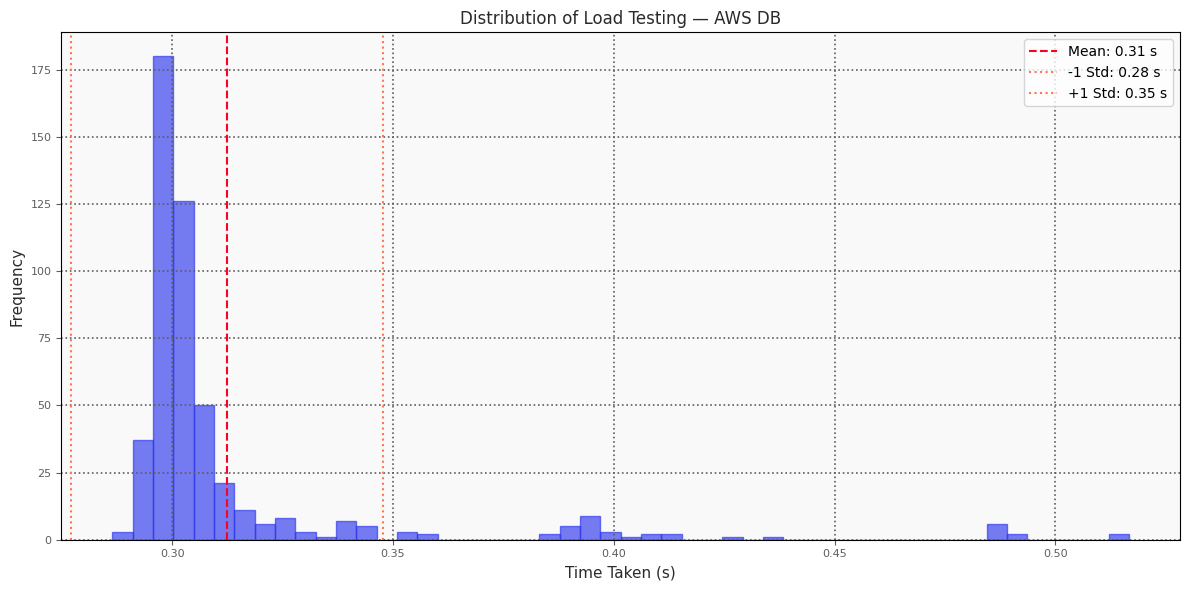

In [26]:
import matplotlib.pyplot as plt

time_taken = data_dict['db_load_test']['time_taken']

mean_time = time_taken.mean()
std_time = time_taken.std()

# Settings for the plot
labels_fontsize = 11
labels_fontcolor = "#2A2A2A"
title_fontsize = 12
tick_color = "#5D5D5D"
color = '#2933EB'

# Plot the histogram
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')  # Create figure and axes
fig.patch.set_facecolor('#FFFFFF')
ax.set_facecolor('#F9F9F9')

ax.hist(
    time_taken,
    bins=50,  # Use 40 bins for the histogram
    color=color,
    alpha=0.64,
    edgecolor=color,
    linewidth=1,
)

ax.axvline(mean_time, color='#FF0023', linestyle='--', linewidth=1.5, label=f'Mean: {mean_time:.2f} s')
ax.axvline(mean_time - std_time, color='#FF7651', linestyle=':', linewidth=1.5, label=f'-1 Std: {mean_time - std_time:.2f} s')
ax.axvline(mean_time + std_time, color='#FF7651', linestyle=':', linewidth=1.5, label=f'+1 Std: {mean_time + std_time:.2f} s')

# Set title and labels
ax.set_title('Distribution of Load Testing — AWS DB', color=labels_fontcolor, fontsize=title_fontsize)
ax.set_xlabel('Time Taken (s)', color=labels_fontcolor, fontsize=labels_fontsize)
ax.set_ylabel('Frequency', color=labels_fontcolor, fontsize=labels_fontsize)

# gridlines
ax.grid(True, linestyle='dotted', linewidth=1.2, color=tick_color)

# legend
ax.legend(loc='upper right', fontsize=10)

# ticks
ax.tick_params(labelsize=8, color=tick_color, labelcolor=tick_color)

# # Add text annotation for standard deviation
# ax.text(
#     0.95, 0.85, 
#     f'Standard Deviation: {std_time:.2f} s', 
#     transform=ax.transAxes, 
#     fontsize=12, 
#     color='black', 
#     ha='right', 
#     bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.7)
# )

plt.tight_layout()

# Show the plot
plt.show()

In [27]:
# print standard deviation and mean
print(f"Mean Time: {mean_time:.2f} s")
print(f"Standard Deviation: {std_time:.2f} s")

Mean Time: 0.31 s
Standard Deviation: 0.04 s


In [30]:
# coefficient of variation (CV)
cv = (std_time / mean_time) 
print(f"Coefficient of Variation: {cv:.2f} %")

Coefficient of Variation: 0.11 %


In [29]:
# Save the plot
save_plot(fig, filename_suffix="load_testing_histogram")

saved as load_testing_histogram at plots/base_measurements


In [9]:
data_dict['3_alpine_os_docker_daemon_python_flask'].head()

,Timestamp,Value_energy,Timestamp,Value_voltage,Timestamp,Value_current,Timestamp,Value_power
0,0.00000,0.000000e+00,0.00000,4.999882,0.00000,0.580430,0.00000,2.902083
1,0.00002,1.612269e-08,0.00002,5.000009,0.00002,0.580529,0.00002,2.902652
2,0.00004,3.224853e-08,0.00004,5.000183,0.00004,0.579902,0.00004,2.899618
3,0.00006,4.835752e-08,0.00006,4.999680,0.00006,0.579119,0.00006,2.895412
4,0.00008,6.444314e-08,0.00008,5.000019,0.00008,0.580260,0.00008,2.901310


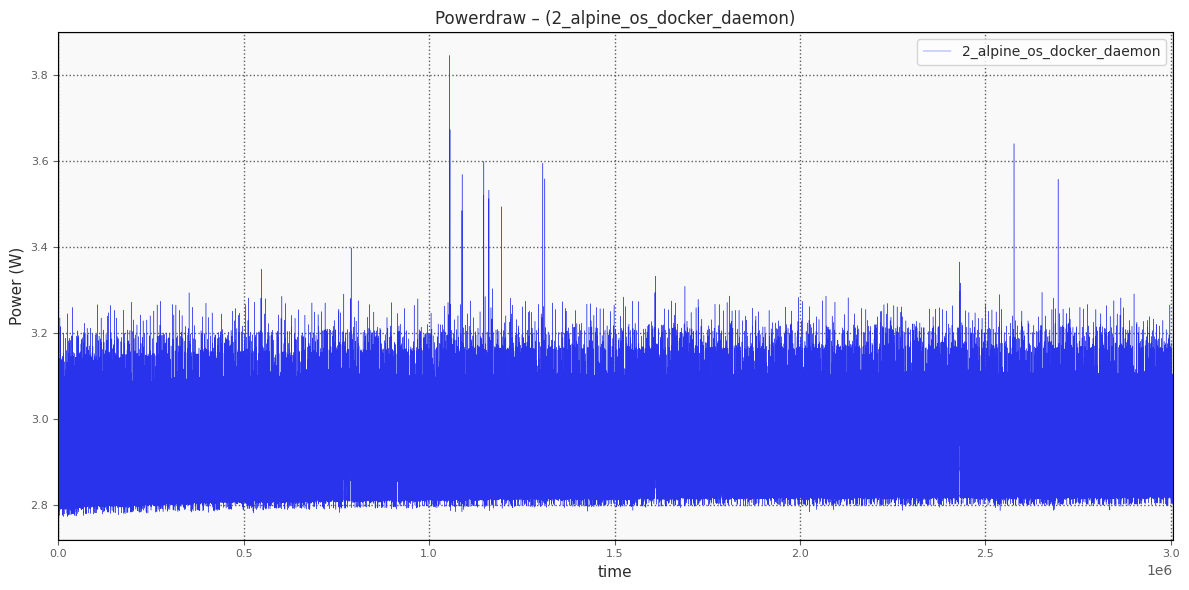

In [10]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

waect_service = '2_alpine_os_docker_daemon'
metric = 'Value_power'
df = data_dict[waect_service]

# settings for this plot
labels_fontsize = 11
labels_fontcolor = "#2A2A2A"
title_fontsize = 12
tick_color = "#5D5D5D"

# Plot single run power consumption
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
fig.patch.set_facecolor('#FFFFFF') 
ax.set_facecolor('#F9F9F9')

ax.plot(
    df.index,
    df[metric],
    linewidth=0.3,
    color='#2933EB'
)

# only if cumulative energy is polotted
if metric == 'cumulative_energy':
    ax.fill_between(
        df.index,
        df[metric],
        color='#2933EB',
        alpha=0.3 
    )
    
# Set title and labels
# title, x_label, y_label = define_title_xlable_ylable_line_chart(metric)

ax.grid(True, linestyle='dotted', linewidth=1, color=tick_color)  # Setting custom grid color
ax.set_title(f'{"Powerdraw"} – ({waect_service})', color=labels_fontcolor, fontsize=title_fontsize)  # Set an appropriate title
ax.set_xlabel(f"{"time"}", color=labels_fontcolor, fontsize=labels_fontsize,)  # Set an appropriate label for the x-axis
ax.set_ylabel(f"{"Power (W)"}", color=labels_fontcolor, fontsize=labels_fontsize)  # Label for the y-axis
ax.tick_params(labelsize=8, color=tick_color, labelcolor=tick_color)
ax.autoscale(enable=True, axis="x", tight=True)

border = Rectangle(
    (0, 0), 1, 1,
    transform=ax.transAxes,
    facecolor='none',
    edgecolor=tick_color,
    linewidth=1.0  
)

ax.add_patch(border)
    
ax.legend([waect_service], loc='upper right', fontsize=10, labelcolor=labels_fontcolor,facecolor="white", framealpha=0.8)
plt.tight_layout()
plt.show()

/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_13834/3078260183.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(


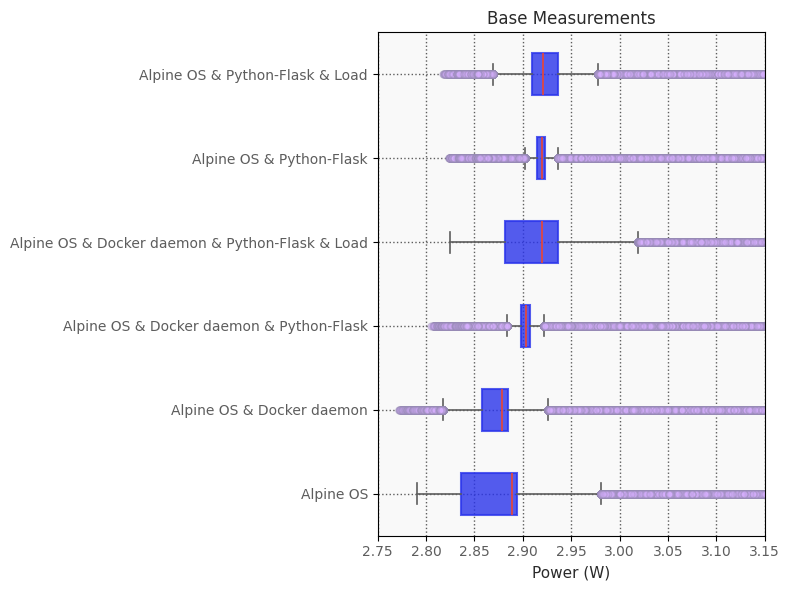

In [11]:
services = [
    '1_alpine_os', 
    '2_alpine_os_docker_daemon', 
    '3_alpine_os_docker_daemon_python_flask', 
    '4_alpine_os_docker_daemon_python_flask_load', 
    '5_alpine_os_python_flask', 
    '6_alpine_os_python_flask_load'
]
metric = 'Value_power'  # Define the metric to compare - possible power, delta, energy

# Prepare data for plotting
grouped_data = []
labels = []
group_colors = ['#2933EB', '#2933EB', '#2933EB', '#2933EB', '#2933EB', '#2933EB']  # Colors for the services (blue, green) currently
median_color = '#EB4532'
legend_labels = ['Alpine OS', 'Alpine OS & Docker daemon', 'Alpine OS & Docker daemon & Python-Flask', 'Alpine OS & Docker daemon & Python-Flask & Load', 'Alpine OS & Python-Flask', 'Alpine OS & Python-Flask & Load']

for i, service in enumerate(services):
    # grouping 
    df_service = data_dict[service]
    service_metric_data = df_service[metric].dropna() 
    grouped_data.append(service_metric_data)
    labels.append(legend_labels[i])

# Plotting
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
ax.set_facecolor('#F9F9F9')

flierprops = {
        'marker': 'o',
        'markerfacecolor': '#D7B0FF',
        'markeredgecolor': '#978AB5',
        'markersize': 5,
        'alpha': 0.4,
    }  

# Box plot
bplot = ax.boxplot(
    grouped_data,
    patch_artist=True,
    widths=0.5,
    labels=labels,
    flierprops=flierprops,
    vert=False
)
# raster fliers
for line in bplot['fliers']:
    line.set_rasterized(True)
    
customize_boxplot(bplot, group_colors, tick_color, median_color)

# Set title and labels
ax.set_title(f'Base Measurements', color=labels_fontcolor, fontsize=title_fontsize)
ax.set_ylabel(f'', color=labels_fontcolor, fontsize=labels_fontsize)
ax.set_xlabel(f'Power (W)', color=labels_fontcolor, fontsize=labels_fontsize)

# Customize tick labels
ax.tick_params(axis='x', labelsize=10, rotation=0, labelcolor='#5D5D5D')
ax.tick_params(axis='y', labelsize=10, labelcolor='#5D5D5D')
ax.grid(True, linestyle='dotted', linewidth=1.0, color=tick_color)

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color, alpha=0.8) for color in group_colors]
# ax.legend(handles, legend_labels, loc='upper right', fontsize=10)

# Optional set y-axis limits for better visualization
ax.set_xlim(2.75, 3.15)

plt.tight_layout()
plt.show()

In [12]:
# save the plot
save_plot(fig, filename_suffix="base_power_comparison")

saved as base_power_comparison at plots/base_measurements


In [13]:
print(data_dict.keys())
print(dirs_analysis)

dict_keys(['1_alpine_os', '2_alpine_os_docker_daemon', '3_alpine_os_docker_daemon_python_flask', '4_alpine_os_docker_daemon_python_flask_load', '5_alpine_os_python_flask', '6_alpine_os_python_flask_load', 'db_load_test'])
['1_alpine_os', '2_alpine_os_docker_daemon', '3_alpine_os_docker_daemon_python_flask', '4_alpine_os_docker_daemon_python_flask_load', '5_alpine_os_python_flask', '6_alpine_os_python_flask_load', 'db_load_test']


In [14]:
# create final result table for base measurements
table_keys = [
    '1_alpine_os', 
    '2_alpine_os_docker_daemon', 
    '3_alpine_os_docker_daemon_python_flask', 
    '4_alpine_os_docker_daemon_python_flask_load', 
    '5_alpine_os_python_flask', 
    '6_alpine_os_python_flask_load'
]
final_results = {}

for key in table_keys:
    df_service = data_dict[key]
    final_energy = df_service['Value_power']
    
    q1 = final_energy.quantile(0.25)
    q3 = final_energy.quantile(0.75)
    iqr = q3 - q1
    
    # Define Q0 and Q4 using the whisker limits
    q0 = max(final_energy.min(), q1 - 1.5 * iqr)  # Minimum within whiskers
    q4 = min(final_energy.max(), q3 + 1.5 * iqr)  # Maximum within whiskers
    
    # Filter data within the whisker range
    filtered_energy = final_energy[
        (final_energy >= q0) & (final_energy <= q4)
    ]
    
    # Calculate statistics using the filtered data
    statistics = {
        "min (q0)": round(q0, 3),
        "q1": round(q1, 3),
        "median (q2)": round(filtered_energy.median(), 3),
        "q3": round(q3, 3),
        "max (q4)": round(q4, 3),
        "mean (μ)": round(filtered_energy.mean(), 3),
        "std (σ)": round(filtered_energy.std(), 3),
    }
    final_results[key] = statistics

final_results_df = pd.DataFrame(final_results)
final_results_df = final_results_df.T
final_results_df.reset_index(inplace=True)
final_results_df.rename(columns={'index': 'base power (W)'}, inplace=True)

print(final_results_df)

                                base power (W)  min (q0)     q1  median (q2)  \
0                                  1_alpine_os     2.790  2.837        2.889   
1                    2_alpine_os_docker_daemon     2.817  2.858        2.878   
2       3_alpine_os_docker_daemon_python_flask     2.884  2.898        2.903   
3  4_alpine_os_docker_daemon_python_flask_load     2.824  2.882        2.916   
4                     5_alpine_os_python_flask     2.902  2.915        2.919   
5                6_alpine_os_python_flask_load     2.869  2.910        2.920   

      q3  max (q4)  mean (μ)  std (σ)  
0  2.894     2.980     2.877    0.035  
1  2.885     2.926     2.870    0.025  
2  2.907     2.922     2.903    0.006  
3  2.937     3.020     2.908    0.036  
4  2.923     2.936     2.919    0.005  
5  2.937     2.977     2.922    0.019  


In [15]:
# save base measurements results:
final_results_df.to_csv('./result_tables/base_measurements/descr_stats_bm_power.csv', index=False, sep=';')

---
**1. Percentage Overhead of Docker compared to Alpine:**

In [24]:
mean_os = final_results_df.loc[final_results_df['base power (W)'] == '1_alpine_os', 'mean (μ)'].values[0]
mean_docker = final_results_df.loc[final_results_df['base power (W)'] == '3_alpine_os_docker_daemon_python_flask', 'mean (μ)'].values[0]

# Calculate Docker overhead
docker_overhead = mean_docker - mean_os
percentage_overhead = (docker_overhead / mean_os) * 100

# Display the results
print(f"mean_os: {mean_os} W")
print(f"mean_docker: {mean_docker} W")
print(f"Docker daemon overhead (W): {docker_overhead:.3f} W")
print(f"Docker daemon overhead (%): {percentage_overhead:.2f}%")

mean_os: 2.877 W
mean_docker: 2.903 W
Docker daemon overhead (W): 0.026 W
Docker daemon overhead (%): 0.90%


---
**2. Power bare metal Python and dockerd python:**

In [25]:
mean_bare_python = final_results_df.loc[final_results_df['base power (W)'] == '5_alpine_os_python_flask', 'mean (μ)'].values[0]
mean_docker = final_results_df.loc[final_results_df['base power (W)'] == '3_alpine_os_docker_daemon_python_flask', 'mean (μ)'].values[0]

# Calculate Docker overhead
docker_overhead = mean_docker - mean_bare_python
percentage_overhead = (docker_overhead / mean_bare_python) * 100

# Display the results
print(f"mean_bare_python: {mean_bare_python} W")
print(f"mean_docker: {mean_docker} W")
print(f"Docker daemon overhead (W): {docker_overhead:.3f} W")
print(f"Docker daemon overhead (%): {percentage_overhead:.2f}%")

mean_bare_python: 2.919 W
mean_docker: 2.903 W
Docker daemon overhead (W): -0.016 W
Docker daemon overhead (%): -0.55%


---
**3. Percentage of Overhead of Docker Deamon & python-flask with load**

In [18]:

mean_os = data_dict['6_bare_os_python-flask_w_load']['Value_power'].mean()
mean_docker = data_dict['4_bare_os_docker_python-flask_w_load']['Value_power'].mean()
percentage_overhead = ((mean_docker - mean_os) / mean_os) * 100
print(f"Docker daemon & python-flask with load overhead: {percentage_overhead:.2f}%")

print(mean_os)
print(mean_docker)

KeyError: '6_bare_os_python-flask_w_load'

---
**4. Delta Power (Absolute Difference):**

In [45]:
delta_power = mean_docker - mean_os
print(f"Absolute power increase due to Docker daemon & python-flask running with load: {delta_power:.4f} W")

Absolute power increase due to Docker daemon & python-flask running with load: 0.0354 W


---
**Power Variance or Stability:**
* Hypothesis: Docker does not significantly increase the variability of power consumption.
* Low variability suggests that Docker's resource usage is consistent and efficient.

In [46]:
std_os = data_dict['1_bare_os']['Value_power'].std()
std_docker = data_dict['2_bare_os_w_docker']['Value_power'].std()
print(f"Power variability (bare OS): {std_os:.4f} W")
print(f"Power variability (Docker): {std_docker:.4f} W")

Power variability (bare OS): 0.0395 W
Power variability (Docker): 0.0402 W


---
**Impact Relative to Workload:**
* Comparison of Docker's power consumption with and without a containerized workload (e.g., Python Flask):
* A small relative impact emphasizes that Docker's contribution to overall energy usage is minimal compared to the workload.

In [47]:
mean_flask = data_dict['3_bare_os_w_docker_python-flask']['Value_power'].mean()
relative_impact = (mean_docker - mean_os) / (mean_flask - mean_os) * 100
print(f"Comparison Docker consumption with and without a containerized workload: {relative_impact:.2f}%")


Comparison Docker consumption with and without a containerized workload: -68.33%
